# Portuguese Bank Marketing Campaign Analysis

This project explores marketing campaign data from a Portuguese bank to understand customer behavior and identify patterns that influence subscription to term deposits.

---



##  Table of Contents
1. [Introduction](#introduction)  
2. [Data Loading & First Inspection](#data-loading--first-inspection)  
3. [Exploratory Data Analysis](#exploratory-data-analysis)  
   - [Categorical Columns](#categorical-columns)  
   - [Numeric Columns](#numeric-columns)  
   - [Binning Numeric Features into Buckets](#binning-numeric-features-into-buckets)  
   - [Heatmap of Numeric Columns](#heatmap-of-numeric-columns)  
4. [Feature Engineering](#feature-engineering)  
5. [Model Building](#model-building)  
   - [Logistic Regression](#logistic-regression)  
   - [Random Forest Classifier](#random-forest-classifier)  
   - [XG Boost](#xg-boost)  
6. [Evaluation & Profit Computation](#evaluation--profit-computation)  
   - [ROC Curve](#roc-curve)  
   - [Profitability Threshold Computation](#profitability-threshold-computation)  


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm
from scipy.stats import chi2_contingency

##Data Loading & First Inspection

In [ ]:
# Load dataset (update path as needed)
df = pd.read_csv("bank-full.csv", sep=';', quotechar='"')

In [ ]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


### 🎯 Convert Target Variable
The original target column `'y'` is mapped to a binary format:
- `yes` → 1 (customer subscribed to term deposit)
- `no` → 0 (customer did not subscribe)

In [ ]:
df["response_binary"] = df['y'].map({'yes':1, 'no':0})
df["response_binary"] = df["response_binary"].astype(int)


In [ ]:
df.drop(columns="y", inplace= True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              45211 non-null  int64 
 1   job              45211 non-null  object
 2   marital          45211 non-null  object
 3   education        45211 non-null  object
 4   default          45211 non-null  object
 5   balance          45211 non-null  int64 
 6   housing          45211 non-null  object
 7   loan             45211 non-null  object
 8   contact          45211 non-null  object
 9   day              45211 non-null  int64 
 10  month            45211 non-null  object
 11  duration         45211 non-null  int64 
 12  campaign         45211 non-null  int64 
 13  pdays            45211 non-null  int64 
 14  previous         45211 non-null  int64 
 15  poutcome         45211 non-null  object
 16  response_binary  45211 non-null  int64 
dtypes: int64(8), object(9)
memory u

In [ ]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous,response_binary
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323,0.116985
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441,0.321406
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000,1.000000


In [ ]:
df.groupby("job")["response_binary"].value_counts(normalize=True)*100

job            response_binary
admin.         0                  87.797331
               1                  12.202669
blue-collar    0                  92.725031
               1                   7.274969
entrepreneur   0                  91.728312
               1                   8.271688
housemaid      0                  91.209677
               1                   8.790323
management     0                  86.244449
               1                  13.755551
retired        0                  77.208481
               1                  22.791519
self-employed  0                  88.157061
               1                  11.842939
services       0                  91.116996
               1                   8.883004
student        0                  71.321962
               1                  28.678038
technician     0                  88.943004
               1                  11.056996
unemployed     0                  84.497314
               1                  15.502686
unknown        0                  88.194444
               1                  11.805556
Name: proportion, dtype: float64

In [ ]:
df.groupby("marital")["response_binary"].value_counts(normalize=True)

marital   response_binary
divorced  0                  0.883960
          1                  0.116040
married   0                  0.902074
          1                  0.097926
single    0                  0.853710
          1                  0.146290
Name: proportion, dtype: float64

In [ ]:
df.groupby("education")["response_binary"].value_counts(normalize=True)*100

education  response_binary
primary    0                  91.620711
           1                   8.379289
secondary  0                  89.609265
           1                  10.390735
tertiary   0                  85.355412
           1                  14.644588
Name: proportion, dtype: float64

In [ ]:
df["education"].value_counts()

,count
education,
secondary,21933
tertiary,12380
primary,6528


In [ ]:
df["response_binary"].value_counts(normalize=True)

,proportion
response_binary,
0,0.883015
1,0.116985


In [ ]:
subscription_rate = df.groupby("job")["response_binary"].mean().mul(100).sort_values(ascending=False)
subscription_count = df.groupby("job")["response_binary"].count()

std_err = np.sqrt((subscription_rate / 100) * (1 - (subscription_rate / 100)) / subscription_count) * 100
print(subscription_rate)
std_err

job
student          28.678038
retired          22.791519
unemployed       15.502686
management       13.755551
admin.           12.202669
self-employed    11.842939
unknown          11.805556
technician       11.056996
services          8.883004
housemaid         8.790323
entrepreneur      8.271688
blue-collar       7.274969
Name: response_binary, dtype: float64


,response_binary
job,
admin.,0.455178
blue-collar,0.263277
entrepreneur,0.714321
housemaid,0.804104
management,0.354164
retired,0.881619
self-employed,0.813144
services,0.441414
student,1.476675


In [ ]:
df.groupby("marital")["response_binary"].mean().mul(100)


,response_binary
marital,
divorced,11.603952
married,9.792622
single,14.629031


##Exploratory Data Analysis

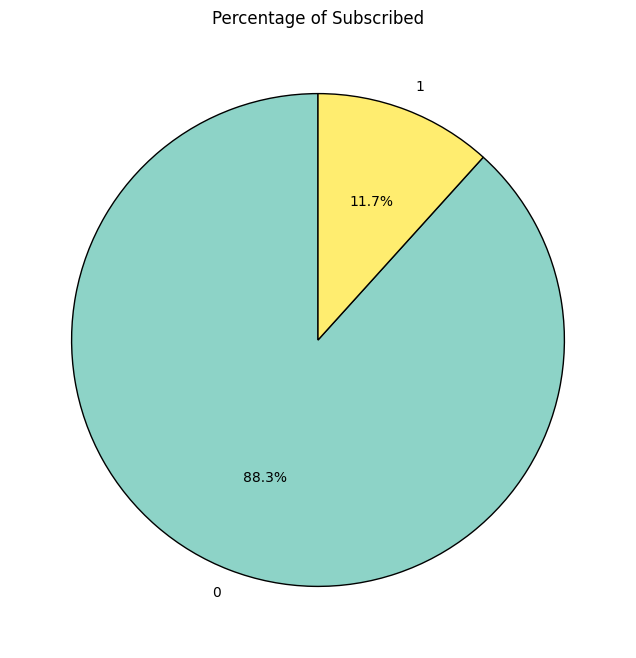

In [ ]:
df["response_binary"].value_counts().plot(
    kind="pie",
    autopct = "%1.1f%%",figsize =(8,8),
    startangle=90,
    cmap ="Set3",
    wedgeprops={'edgecolor': 'black'}
)

plt.title("Percentage of Subscribed")
plt.ylabel("")
plt.show()

### Categorical Columns

In [ ]:
def bar_plots_with_error_bars(df, column):
# Compute subscription percentage by marital status
  subscription_rates = df.groupby(column)["response_binary"].mean().mul(100)
  subscription_counts = df.groupby(column)["response_binary"].count()

  # Compute standard error (SE) and scale to percentage
  std_error = np.sqrt((subscription_rates / 100) * (1 - (subscription_rates / 100)) / subscription_counts) * 100

  # Sort values and align standard error
  subscription_rates = subscription_rates.sort_values(ascending=False)
  std_error = std_error.reindex(subscription_rates.index)

  # ✅ Convert index to a list for x-axis labels
  x_labels = subscription_rates.index
  y_values = subscription_rates.values

  # ✅ Use Matplotlib to plot bars with error bars
  plt.figure(figsize=(8, 6))

  # Generate a color for each bar from the "viridis" colormap
  colors = cm.viridis(np.linspace(0, 1, len(x_labels)))

  # Create bar positions (Matplotlib needs numerical positions for bars)
  x_positions = np.arange(len(x_labels))

  # Plot bars with error bars
  plt.bar(x_positions, y_values, yerr=std_error, capsize=5, color=colors, alpha=0.75, edgecolor="black")

  # Set x-axis labels
  plt.xticks(x_positions, x_labels, rotation=90)

  # Annotate bars with percentage values
  for i, (value, err) in enumerate(zip(y_values, std_error)):
      plt.text(i, value + err + 1, f'{value:.1f}%', ha='center', fontsize=10)

  # Labels and title
  plt.xlabel(f"{column} Status")
  plt.ylabel("Subscription Rate (%)")
  plt.title(f"Subscription Rate by {column} Status (with Error Bars)")
  plt.ylim(0, max(y_values) + 10)  # Adjust y-axis for visibility
  plt.grid(axis="y", linestyle="--", alpha=0.7)

  # Show plot
  plt.show()


In [ ]:
def chi_square_test(data,column):
  contingency= pd.crosstab(df[column], df["response_binary"])

  chi2, p, dof, expected = chi2_contingency(contingency)
  print(f"Chi-squared statistic: {chi2:.3f}")
  print(f"degree of freedom: {dof}")
  print(f"P-value: {p}")
  print("expected frequency:")
  print(expected)
  return p


In [ ]:
def one_vs_all(df, category_col):
    # Ensure the column exists
    if category_col not in df.columns:
        raise KeyError(f"Column '{category_col}' not found in DataFrame!")

    # Get unique categories
    categories = df[category_col].dropna().unique()  # Drop NaN values

    for category in categories:
        # Create a binary column for One-vs-All comparison
        new_col = f"{category}_vs_all"
        df[new_col] = df[category_col].apply(lambda x: 1 if x == category else 0)

        # Ensure the new column is correctly created
        if new_col not in df.columns:
            raise KeyError(f"Failed to create column '{new_col}'")

        # Create contingency table
        contingency_table = pd.crosstab(df[new_col], df["response_binary"])

        # Perform Chi-Square test
        chi2, p, dof, expected = chi2_contingency(contingency_table)

        print(f"\nOne-vs-All Chi-Square Test: {category} vs All")
        print(f"Chi-Square Statistic: {chi2:.2f}, p-value: {p:.5f}")

        # Interpretation
        if p < 0.05:
            print(f"--> {category} is **significantly different** from other categories!")
        else:
            print(f"--> No significant difference for {category}.")


####Marital column

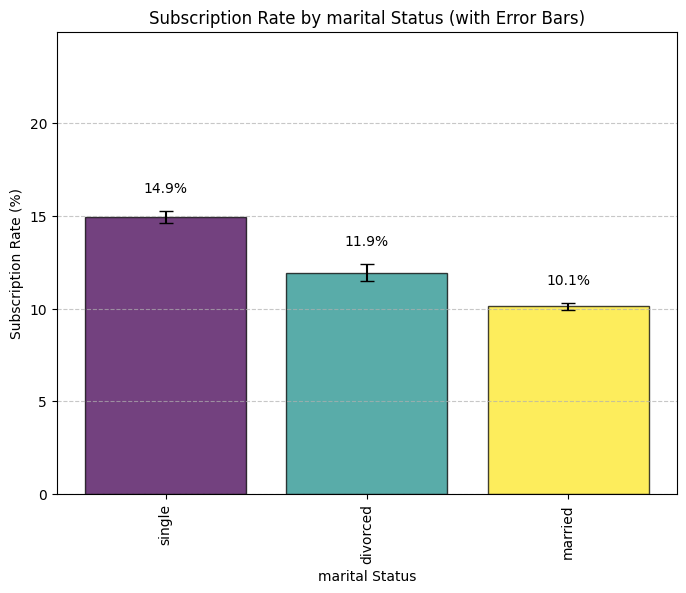

In [ ]:
bar_plots_with_error_bars(df, "marital")

In [ ]:
chi_square_test(df, "marital")

Chi-squared statistic: 196.496
degree of freedom: 2
P-value: 2.1450999986791792e-43
expected frequency:
[[ 4597.86012254   609.13987746]
 [24030.37552808  3183.62447192]
 [11293.76434938  1496.23565062]]


2.1450999986791792e-43

In [ ]:
one_vs_all(df, "marital")


One-vs-All Chi-Square Test: married vs All
Chi-Square Statistic: 163.79, p-value: 0.00000
--> married is **significantly different** from other categories!

One-vs-All Chi-Square Test: single vs All
Chi-Square Statistic: 182.01, p-value: 0.00000
--> single is **significantly different** from other categories!

One-vs-All Chi-Square Test: divorced vs All
Chi-Square Statistic: 0.32, p-value: 0.57101
--> No significant difference for divorced.


single and married has more stastical significance. from the graph, it can be seen that married are less likely to subscribe where has singles are more likely to subscribe.

####Job column

In [ ]:
df.groupby("job")["response_binary"].value_counts()

job            response_binary
admin.         0                  4540
               1                   631
blue-collar    0                  9024
               1                   708
entrepreneur   0                  1364
               1                   123
housemaid      0                  1131
               1                   109
management     0                  8157
               1                  1301
retired        0                  1748
               1                   516
self-employed  0                  1392
               1                   187
services       0                  3785
               1                   369
student        0                   669
               1                   269
technician     0                  6757
               1                   840
unemployed     0                  1101
               1                   202
unknown        0                   254
               1                    34
Name: count, dtype: int64

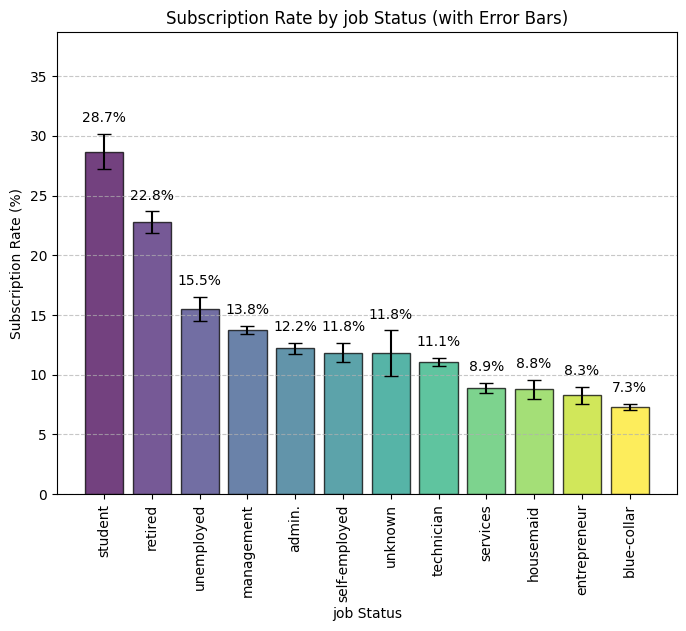

In [ ]:
bar_plots_with_error_bars(df, "job")

In [ ]:
chi_square_test(df, "job")

Chi-squared statistic: 836.105
degree of freedom: 11
P-value: 3.337121944935502e-172
expected frequency:
[[4566.0715755   604.9284245 ]
 [8593.5038818  1138.4961182 ]
 [1313.04359559  173.95640441]
 [1094.93884232  145.06115768]
 [8351.55771825 1106.44228175]
 [1999.14640242  264.85359758]
 [1394.28099356  184.71900644]
 [3668.04512176  485.95487824]
 [ 828.2682533   109.7317467 ]
 [6708.26643958  888.73356042]
 [1150.56879963  152.43120037]
 [ 254.30837628   33.69162372]]


3.337121944935502e-172

In [ ]:
one_vs_all(df, "job")


One-vs-All Chi-Square Test: management vs All
Chi-Square Statistic: 48.74, p-value: 0.00000
--> management is **significantly different** from other categories!

One-vs-All Chi-Square Test: technician vs All
Chi-Square Statistic: 3.56, p-value: 0.05907
--> No significant difference for technician.

One-vs-All Chi-Square Test: entrepreneur vs All
Chi-Square Statistic: 17.14, p-value: 0.00003
--> entrepreneur is **significantly different** from other categories!

One-vs-All Chi-Square Test: blue-collar vs All
Chi-Square Statistic: 234.37, p-value: 0.00000
--> blue-collar is **significantly different** from other categories!

One-vs-All Chi-Square Test: unknown vs All
Chi-Square Statistic: 0.00, p-value: 1.00000
--> No significant difference for unknown.

One-vs-All Chi-Square Test: retired vs All
Chi-Square Statistic: 282.79, p-value: 0.00000
--> retired is **significantly different** from other categories!

One-vs-All Chi-Square Test: admin. vs All
Chi-Square Statistic: 1.38, p-value: 

following jobs have higher stastical significance than others.: Management, student, unemployed, blue-collar, services, entrepreneur, retired, housemaid

####Marital

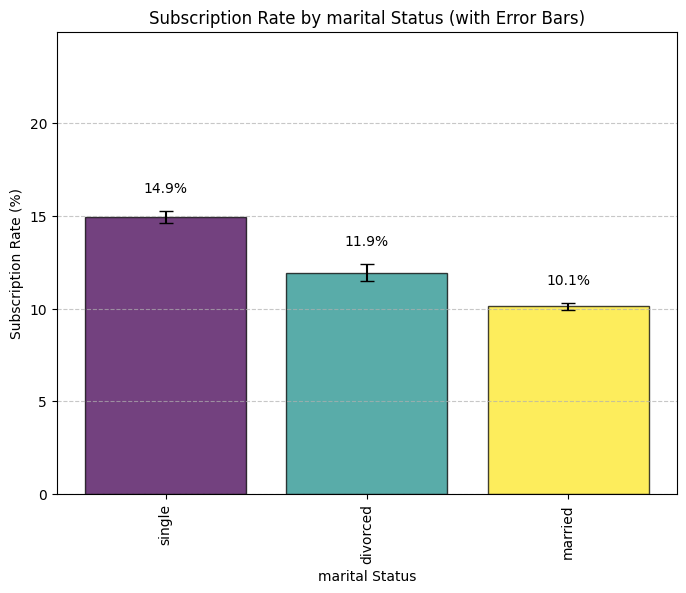

In [ ]:
bar_plots_with_error_bars(df,"marital")

In [ ]:
chi_square_test(df, "marital")

Chi-squared statistic: 196.496
degree of freedom: 2
P-value: 2.1450999986791792e-43
expected frequency:
[[ 4597.86012254   609.13987746]
 [24030.37552808  3183.62447192]
 [11293.76434938  1496.23565062]]


2.1450999986791792e-43

####Education

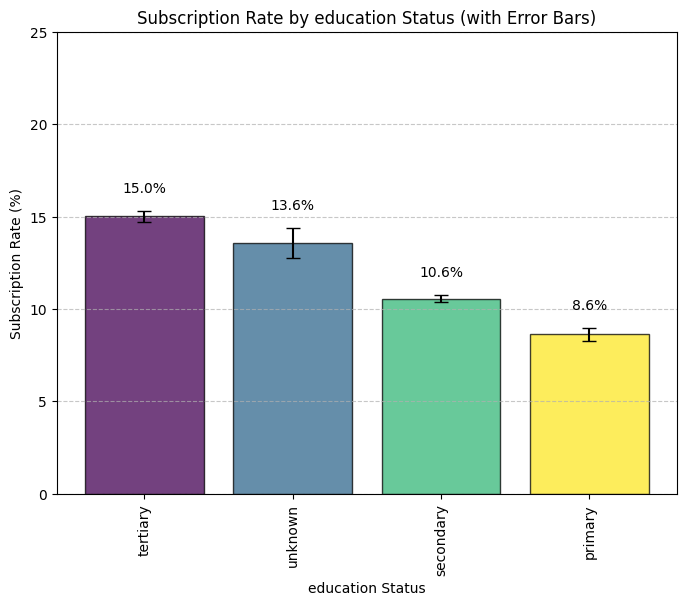

In [ ]:
#education col
bar_plots_with_error_bars(df, "education")

In [ ]:
chi_square_test(df, "education")

Chi-squared statistic: 238.924
degree of freedom: 3
P-value: 1.6266562124072994e-51
expected frequency:
[[ 6049.5371038    801.4628962 ]
 [20487.71856407  2714.28143593]
 [11744.98511424  1556.01488576]
 [ 1639.75921789   217.24078211]]


1.6266562124072994e-51

In [ ]:
one_vs_all(df, "education")


One-vs-All Chi-Square Test: tertiary vs All
Chi-Square Statistic: 199.17, p-value: 0.00000
--> tertiary is **significantly different** from other categories!

One-vs-All Chi-Square Test: secondary vs All
Chi-Square Statistic: 59.64, p-value: 0.00000
--> secondary is **significantly different** from other categories!

One-vs-All Chi-Square Test: unknown vs All
Chi-Square Statistic: 6.38, p-value: 0.01154
--> unknown is **significantly different** from other categories!

One-vs-All Chi-Square Test: primary vs All
Chi-Square Statistic: 73.42, p-value: 0.00000
--> primary is **significantly different** from other categories!


####Default column

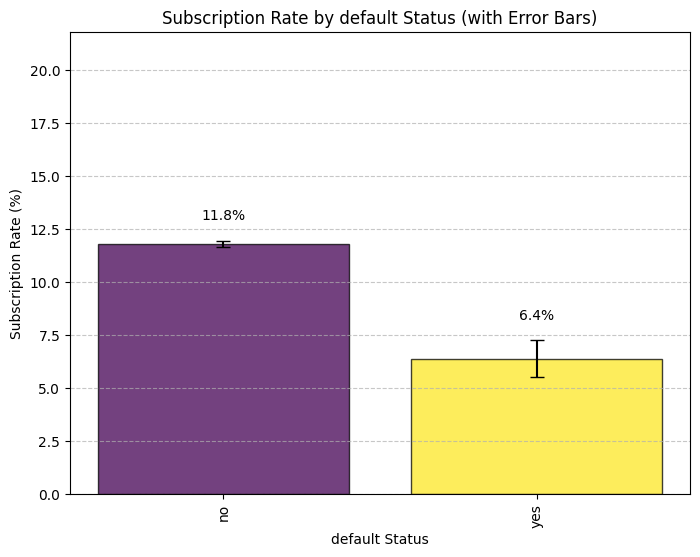

In [ ]:
#default
bar_plots_with_error_bars(df, "default")

In [ ]:
df['default'].value_counts()

,count
default,
no,44396
yes,815


In [ ]:
chi_square_test(df, "default")

Chi-squared statistic: 22.202
degree of freedom: 1
P-value: 2.4538606753508344e-06
expected frequency:
[[39202.34261574  5193.65738426]
 [  719.65738426    95.34261574]]


2.4538606753508344e-06

In [ ]:
one_vs_all(df, "default")


One-vs-All Chi-Square Test: no vs All
Chi-Square Statistic: 22.20, p-value: 0.00000
--> no is **significantly different** from other categories!

One-vs-All Chi-Square Test: yes vs All
Chi-Square Statistic: 22.20, p-value: 0.00000
--> yes is **significantly different** from other categories!


since the subscribers percentage is alsomst similar to non default subscribers and number of people who have defaulted is very low, its not necessary to perform chi square test. since it would not be statistically significant.

####Housing:

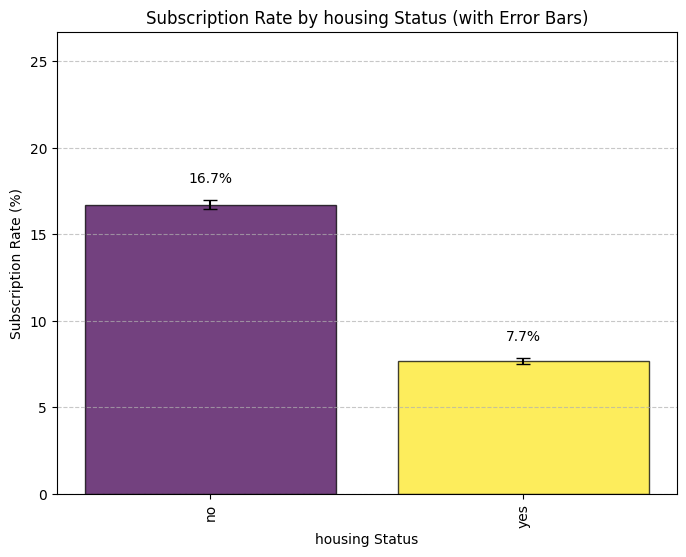

In [ ]:
#housing
bar_plots_with_error_bars(df, "housing")

In [ ]:
chi_square_test(df, "housing")

Chi-squared statistic: 874.822
degree of freedom: 1
P-value: 2.918797605076633e-192
expected frequency:
[[17731.82813917  2349.17186083]
 [22190.17186083  2939.82813917]]


2.918797605076633e-192

In [ ]:
one_vs_all(df, "housing")


One-vs-All Chi-Square Test: yes vs All
Chi-Square Statistic: 720.30, p-value: 0.00000
--> yes is **significantly different** from other categories!

One-vs-All Chi-Square Test: no vs All
Chi-Square Statistic: 720.30, p-value: 0.00000
--> no is **significantly different** from other categories!


####Loan

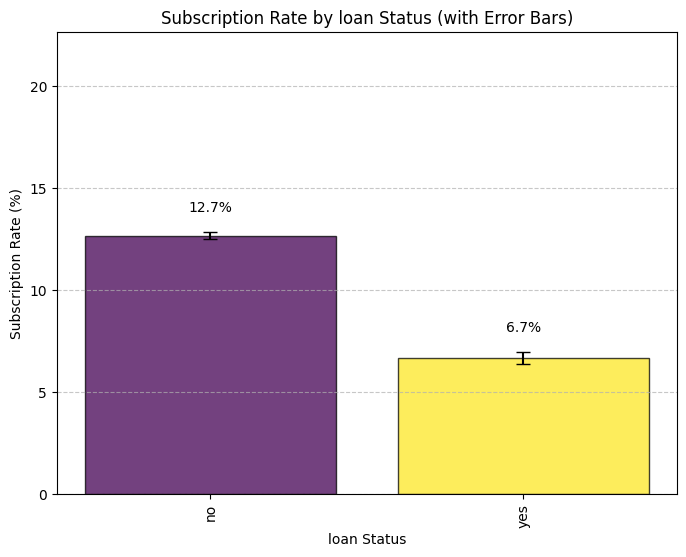

In [ ]:
#loan
bar_plots_with_error_bars(df, "loan")

In [ ]:
chi_square_test(df, "loan")

Chi-squared statistic: 209.617
degree of freedom: 1
P-value: 1.665061163492756e-47
expected frequency:
[[33525.4379244  4441.5620756]
 [ 6396.5620756   847.4379244]]


1.665061163492756e-47

In [ ]:
one_vs_all(df, "loan")


One-vs-All Chi-Square Test: no vs All
Chi-Square Statistic: 176.98, p-value: 0.00000
--> no is **significantly different** from other categories!

One-vs-All Chi-Square Test: yes vs All
Chi-Square Statistic: 176.98, p-value: 0.00000
--> yes is **significantly different** from other categories!


####Month:

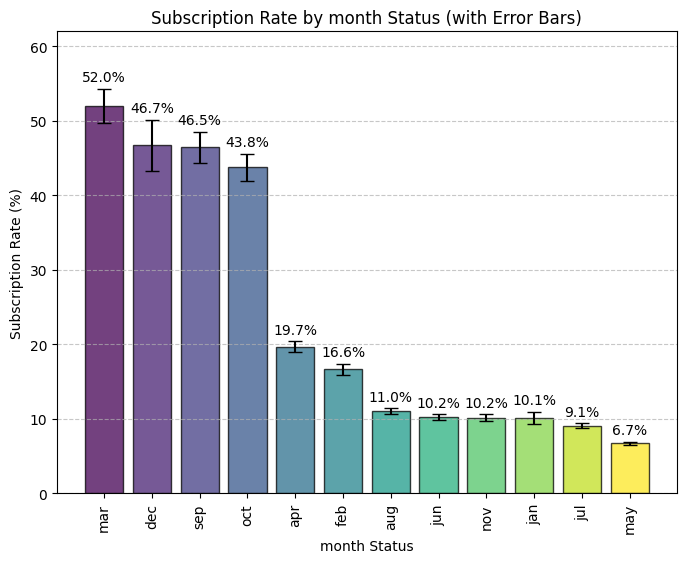

In [ ]:
#month
bar_plots_with_error_bars(df, "month")

In [ ]:
chi_square_test(df, "month")

Chi-squared statistic: 3061.839
degree of freedom: 11
P-value: 0.0
expected frequency:
[[ 2589.00055296   342.99944704]
 [ 5516.19592577   730.80407423]
 [  188.96525182    25.03474818]
 [ 2339.10725266   309.89274734]
 [ 1238.87031917   164.12968083]
 [ 6088.3897724    806.6102276 ]
 [ 4716.18415872   624.81584128]
 [  421.19824821    55.80175179]
 [12155.58718011  1610.41281989]
 [ 3505.57032581   464.42967419]
 [  651.66521422    86.33478578]
 [  511.26579815    67.73420185]]


0.0

In [ ]:
one_vs_all(df, "month")


One-vs-All Chi-Square Test: may vs All
Chi-Square Statistic: 474.31, p-value: 0.00000
--> may is **significantly different** from other categories!

One-vs-All Chi-Square Test: jun vs All
Chi-Square Statistic: 12.61, p-value: 0.00038
--> jun is **significantly different** from other categories!

One-vs-All Chi-Square Test: jul vs All
Chi-Square Statistic: 53.15, p-value: 0.00000
--> jul is **significantly different** from other categories!

One-vs-All Chi-Square Test: aug vs All
Chi-Square Statistic: 3.22, p-value: 0.07284
--> No significant difference for aug.

One-vs-All Chi-Square Test: oct vs All
Chi-Square Statistic: 743.75, p-value: 0.00000
--> oct is **significantly different** from other categories!

One-vs-All Chi-Square Test: nov vs All
Chi-Square Statistic: 9.92, p-value: 0.00163
--> nov is **significantly different** from other categories!

One-vs-All Chi-Square Test: dec vs All
Chi-Square Statistic: 252.03, p-value: 0.00000
--> dec is **significantly different** from othe

####Poutcome

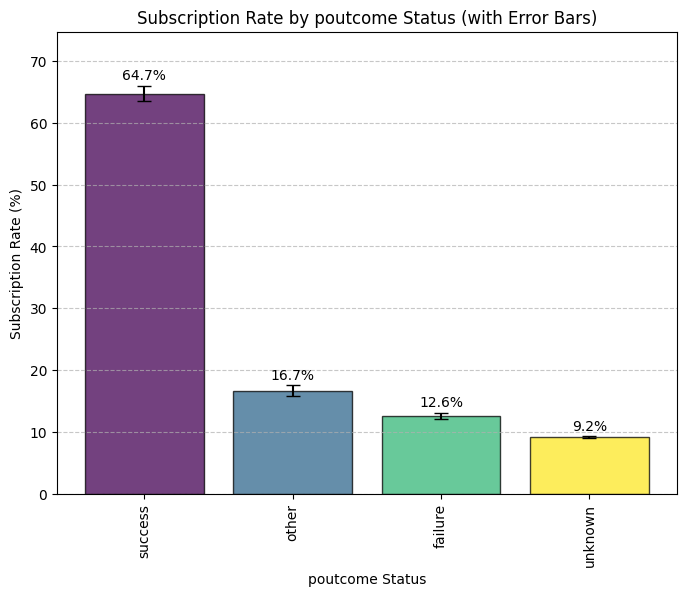

In [ ]:
bar_plots_with_error_bars(df, "poutcome")

In [ ]:
df.groupby("poutcome")["response_binary"].value_counts()

poutcome  response_binary
failure   0                   4283
          1                    618
other     0                   1533
          1                    307
success   1                    978
          0                    533
unknown   0                  33573
          1                   3386
Name: count, dtype: int64

In [ ]:
chi_square_test(df, "poutcome")

Chi-squared statistic: 4391.507
degree of freedom: 3
P-value: 0.0
expected frequency:
[[ 4327.65747274   573.34252726]
 [ 1624.74795957   215.25204043]
 [ 1334.23596028   176.76403972]
 [32635.35860742  4323.64139258]]


0.0

In [ ]:
one_vs_all(df, "poutcome")


One-vs-All Chi-Square Test: unknown vs All
Chi-Square Statistic: 1260.31, p-value: 0.00000
--> unknown is **significantly different** from other categories!

One-vs-All Chi-Square Test: failure vs All
Chi-Square Statistic: 4.32, p-value: 0.03767
--> failure is **significantly different** from other categories!

One-vs-All Chi-Square Test: other vs All
Chi-Square Statistic: 45.66, p-value: 0.00000
--> other is **significantly different** from other categories!

One-vs-All Chi-Square Test: success vs All
Chi-Square Statistic: 4249.91, p-value: 0.00000
--> success is **significantly different** from other categories!


Check why this is not working? why is the shape of y changing when sent into sns

### Numeric Columns

In [ ]:
df_numeric = df.select_dtypes(include="number")

In [ ]:
df_numeric.head()

,age,balance,day,duration,campaign,pdays,previous,response_binary
0,58,2143,5,261,1,-1,0,0
1,44,29,5,151,1,-1,0,0
2,33,2,5,76,1,-1,0,0
3,47,1506,5,92,1,-1,0,0
4,33,1,5,198,1,-1,0,0


In [ ]:
numeric_columns = ["age",'balance', 'day', 'duration', 'campaign', 'pdays', 'previous', 'response_binary']
df_numeric= df[numeric_columns]

In [ ]:
def box_plot(data, column):
    plt.figure(figsize=(8,6))
    sns.boxplot(x = df_numeric["response_binary"], y= df_numeric[column])
    plt.xlabel("Subscription")
    plt.ylabel(column)
    plt.title(f"Box Plot of {column} by Subscription")
    plt.show()

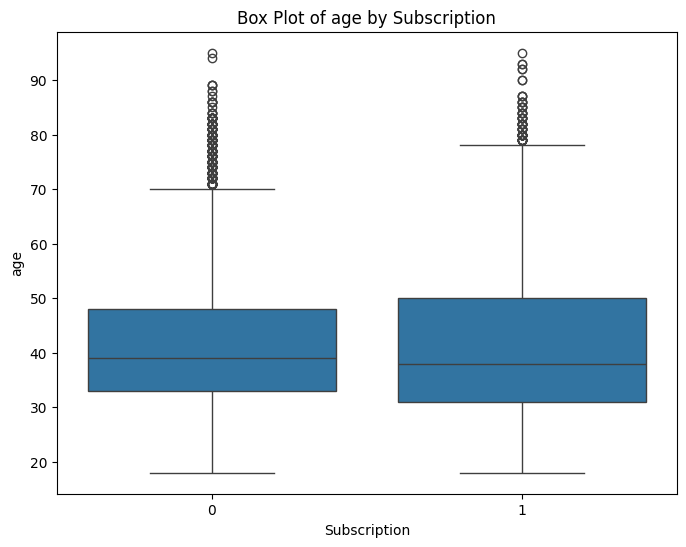

In [ ]:
box_plot(df_numeric, "age")

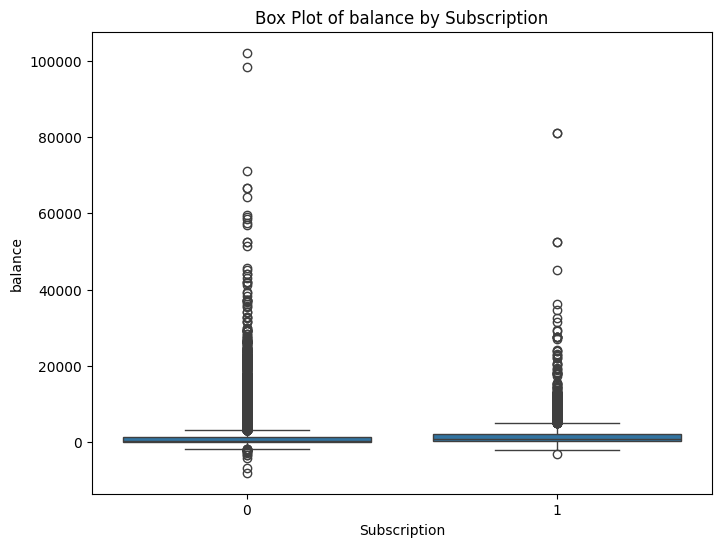

In [ ]:
box_plot(df_numeric, "balance")

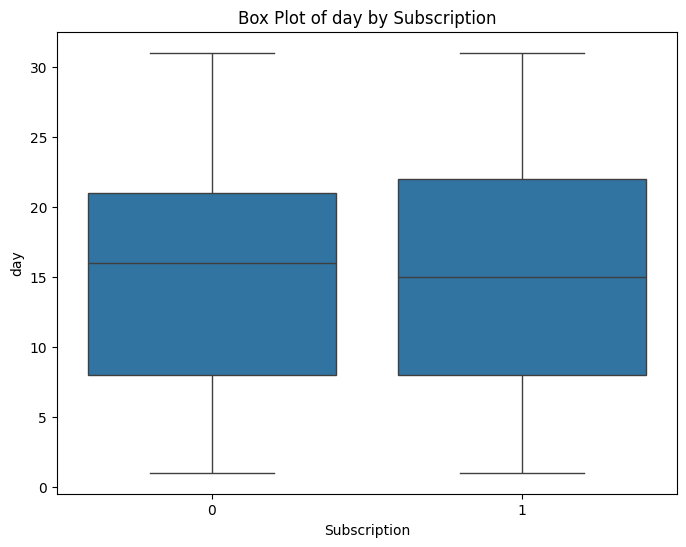

In [ ]:
box_plot(df_numeric, "day")

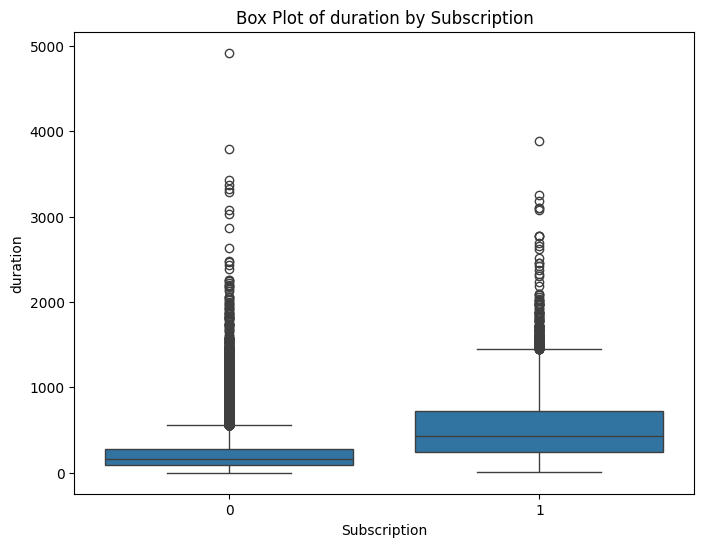

In [ ]:
box_plot(df_numeric, "duration")

longer duration result in subscription.

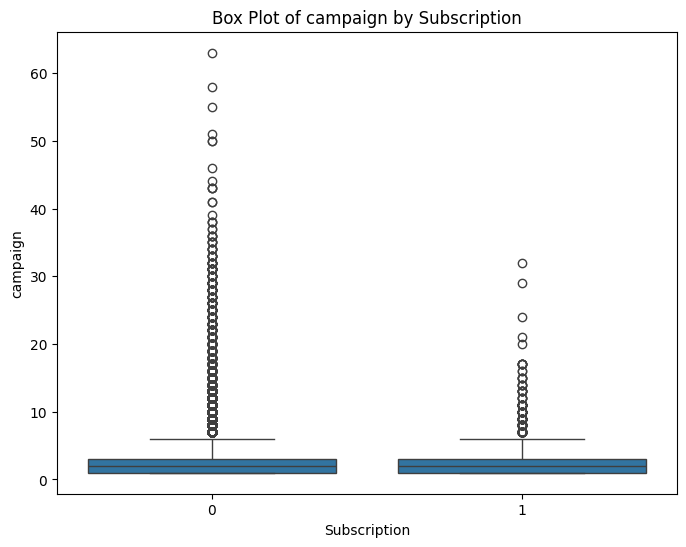

In [ ]:
box_plot(df_numeric, "campaign")

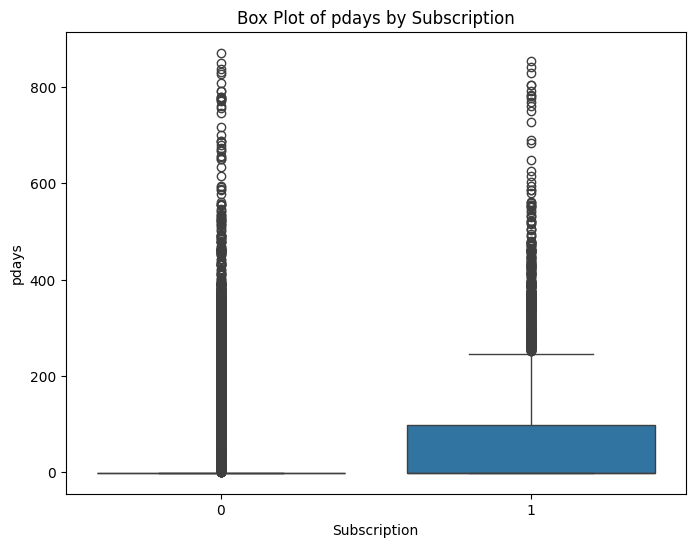

In [ ]:
box_plot(df_numeric, "pdays")

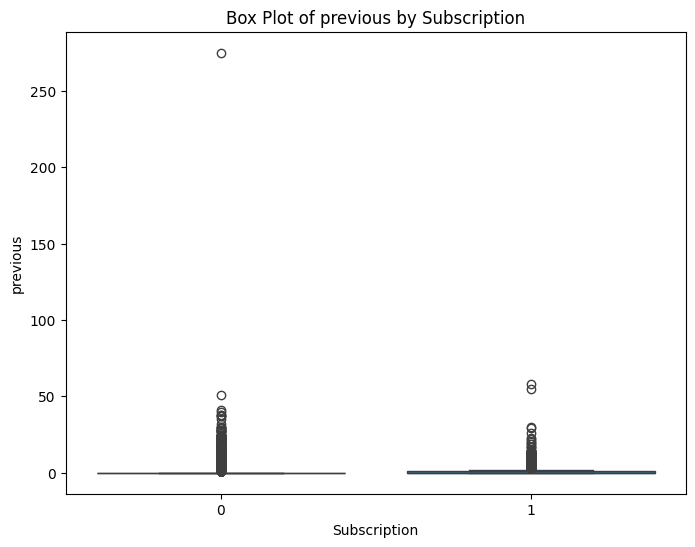

In [ ]:
box_plot(df_numeric, "previous")

###Binning Numeric Features into Buckets

####Age Grouping:

In [ ]:
df[df["response_binary"]==0]["age"].value_counts().sum()

36202

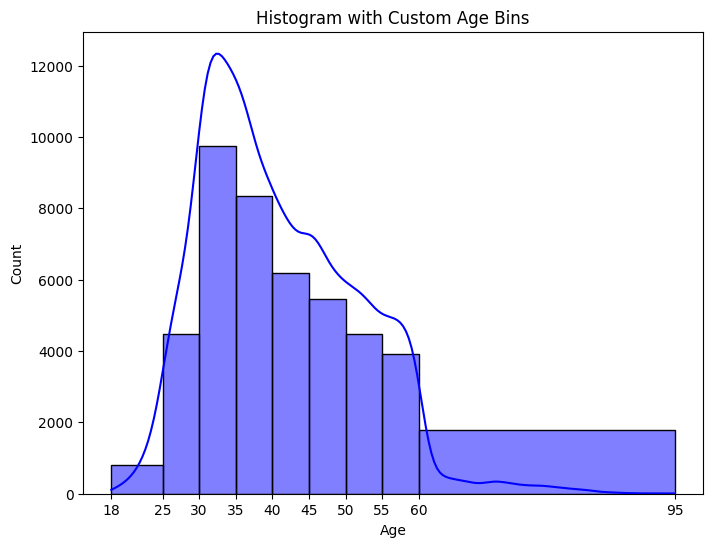

In [ ]:
bins = [18,25,30, 35,40,45,50,55,60,95]
labels = ["18-25","25-30","30-35","35-40","40-45","45-50","50-55","55-60","60-95"]
df["age_group"]= pd.cut(df["age"], bins=bins, labels=labels, include_lowest=True)
# Visualizing the new age groups
plt.figure(figsize=(8,6))
sns.histplot(df["age"], bins=bins, kde=True, color="blue")
plt.xticks(bins)
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Histogram with Custom Age Bins")
plt.show()

<ipython-input-13-05c02ba753aa>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("age_group")["response_binary"].mean().plot(kind="bar", color="blue")


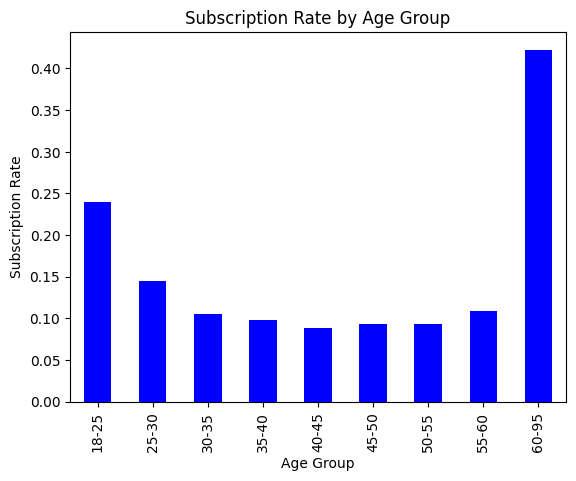

In [ ]:
df.groupby("age_group")["response_binary"].mean().plot(kind="bar", color="blue")
plt.xlabel("Age Group")
plt.ylabel("Subscription Rate")
plt.title("Subscription Rate by Age Group")
plt.show()

Age group above 60 have higher subscription rate

<ipython-input-14-723d5d0bcd6b>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby(['job', 'age_group'])['response_binary'].mean().reset_index()


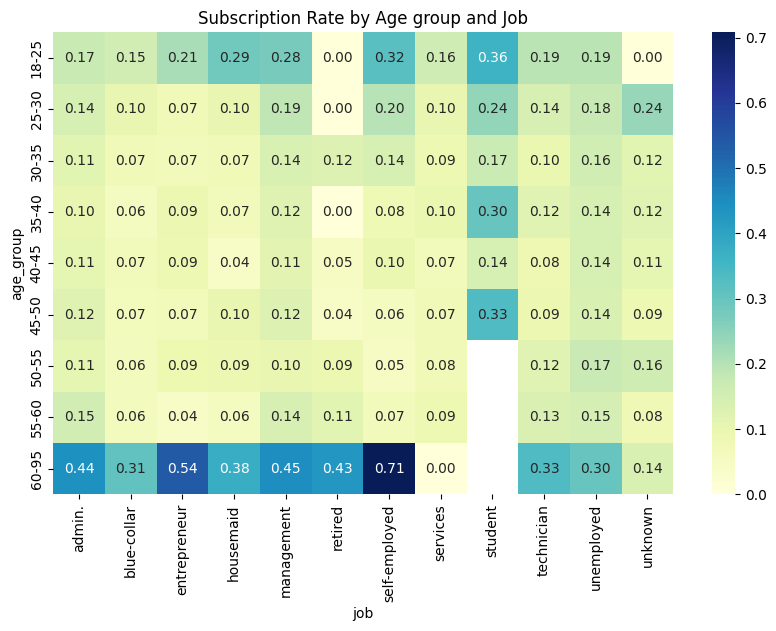

In [ ]:
# Calculate mean subscription rate by group
grouped = df.groupby(['job', 'age_group'])['response_binary'].mean().reset_index()

# Pivot so that 'job' is columns and 'age_bin' is rows
pivot_table = grouped.pivot(index='age_group', columns='job', values='response_binary')

# Plot a heatmap
plt.figure(figsize=(10,6))
sns.heatmap(pivot_table, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title('Subscription Rate by Age group and Job')
plt.show()

####Pdays Grouping:

In [ ]:
df["pdays"].max()

871

<ipython-input-8-302a52ecf14c>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  subscription_rates = df.groupby(column)["response_binary"].mean().mul(100)
<ipython-input-8-302a52ecf14c>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  subscription_counts = df.groupby(column)["response_binary"].count()


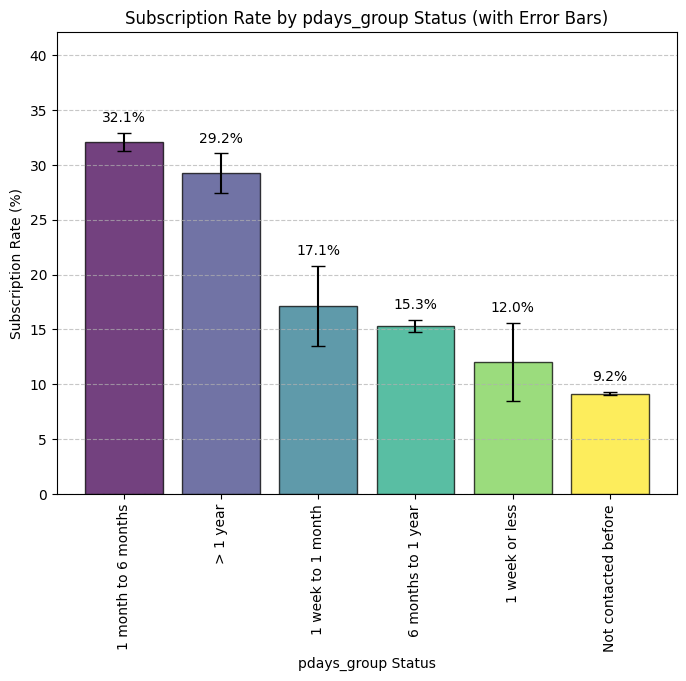

In [ ]:
bins_pdays = [-2, 0, 7, 30, 182, 365, df["pdays"].max()]  # -2 to include -1
labels_pdays = ["Not contacted before", "1 week or less", "1 week to 1 month", "1 month to 6 months","6 months to 1 year", "> 1 year"]

# Apply binning
df["pdays_group"] = pd.cut(df["pdays"], bins=bins_pdays, labels=labels_pdays, include_lowest=True)

bar_plots_with_error_bars(df, "pdays_group")


In [ ]:
chi_square_test(df, "pdays_group")

Chi-squared statistic: 1803.035
degree of freedom: 5
P-value: 0.0
expected frequency:
[[3.26309435e+04 4.32305647e+03]
 [7.32902612e+01 9.70973878e+00]
 [9.27165955e+01 1.22834045e+01]
 [2.90865205e+03 3.85347946e+02]
 [3.64861879e+03 4.83381213e+02]
 [5.67778771e+02 7.52212293e+01]]


0.0

In [ ]:
pday_bins =[]

In [ ]:
df_unknown = df[df["job"]=="unknown"]
df_unknown.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,jan_vs_all,feb_vs_all,mar_vs_all,apr_vs_all,sep_vs_all,failure_vs_all,other_vs_all,success_vs_all,age_group,pdays_group
4,33,unknown,single,unknown,no,1,no,no,unknown,5,...,0,0,0,0,0,0,0,0,30-35,Not contacted before
216,47,unknown,married,unknown,no,28,no,no,unknown,5,...,0,0,0,0,0,0,0,0,45-50,Not contacted before
354,59,unknown,divorced,unknown,no,27,no,no,unknown,5,...,0,0,0,0,0,0,0,0,55-60,Not contacted before
876,37,unknown,single,unknown,no,414,yes,no,unknown,7,...,0,0,0,0,0,0,0,0,35-40,Not contacted before
1072,29,unknown,single,primary,no,50,yes,no,unknown,7,...,0,0,0,0,0,0,0,0,25-30,Not contacted before


In [ ]:
df.groupby(["pdays_group","job"])["response_binary"].value_counts()

<ipython-input-97-4cdb5805e7c2>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(["pdays_group","job"])["response_binary"].value_counts()


pdays_group           job           response_binary
Not contacted before  admin.        0                  3700
                                    1                   382
                      blue-collar   0                  7591
                                    1                   524
                      entrepreneur  0                  1166
                                                       ... 
> 1 year              technician    1                    30
                      unemployed    0                    10
                                    1                    10
                      unknown       1                     2
                                    0                     1
Name: count, Length: 144, dtype: int64

<ipython-input-96-98cfb5e9c53c>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby(["pdays_group","job"])["response_binary"].mean().reset_index()


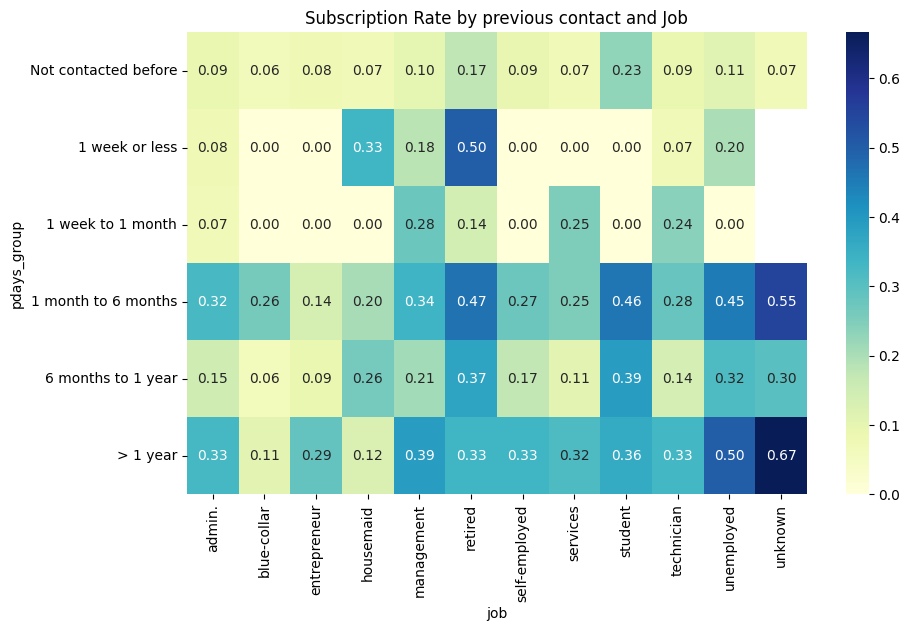

In [ ]:
grouped = df.groupby(["pdays_group","job"])["response_binary"].mean().reset_index()
# Pivot so that 'job' is columns and 'age_bin' is rows
pivot_table = grouped.pivot(index='pdays_group', columns='job', values='response_binary')

# Plot a heatmap
plt.figure(figsize=(10,6))
sns.heatmap(pivot_table, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title('Subscription Rate by previous contact and Job')
plt.show()

<ipython-input-98-644222134d26>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby(["pdays_group","age_group"])["response_binary"].mean().reset_index()


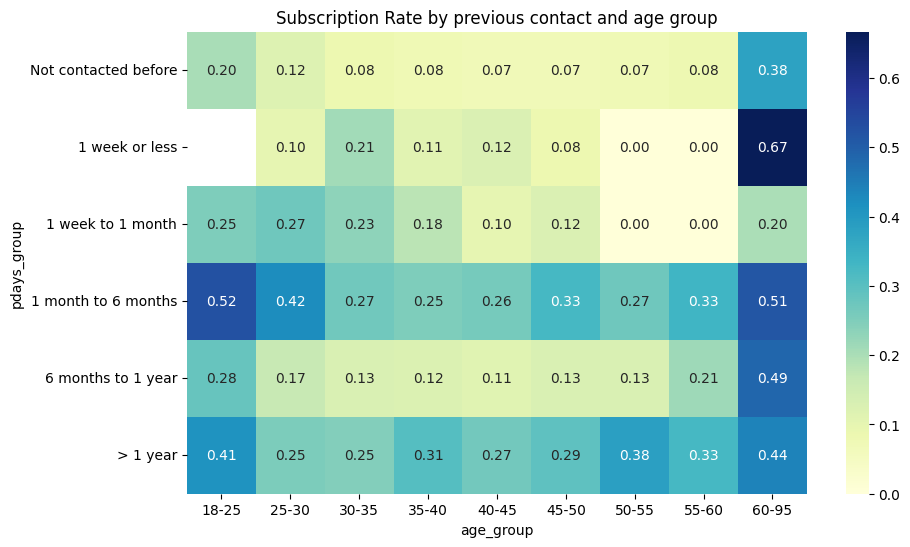

In [ ]:
grouped = df.groupby(["pdays_group","age_group"])["response_binary"].mean().reset_index()
# Pivot so that 'job' is columns and 'age_bin' is rows
pivot_table = grouped.pivot(index='pdays_group', columns='age_group', values='response_binary')

# Plot a heatmap
plt.figure(figsize=(10,6))
sns.heatmap(pivot_table, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title('Subscription Rate by previous contact and age group')
plt.show()

###Heatmap of numeric columns

<Axes: >

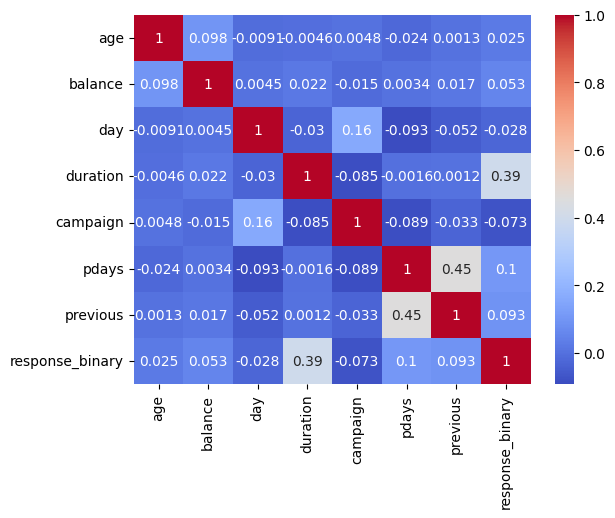

In [ ]:
sns.heatmap(df_numeric.corr(), annot=True, cmap="coolwarm")

In [ ]:
!pip install ace_tools

In [ ]:
df = df.drop(columns = [cols for cols in df.columns if cols.endswith("_vs_all")])

In [ ]:
df.drop(columns="duration", inplace=True)

In [ ]:
df["response_binary"] = df.pop("response_binary")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   age              45211 non-null  int64   
 1   job              45211 non-null  object  
 2   marital          45211 non-null  object  
 3   education        45211 non-null  object  
 4   default          45211 non-null  object  
 5   balance          45211 non-null  int64   
 6   housing          45211 non-null  object  
 7   loan             45211 non-null  object  
 8   contact          45211 non-null  object  
 9   day              45211 non-null  int64   
 10  month            45211 non-null  object  
 11  duration         45211 non-null  int64   
 12  campaign         45211 non-null  int64   
 13  pdays            45211 non-null  int64   
 14  previous         45211 non-null  int64   
 15  poutcome         45211 non-null  object  
 16  age_group        45211 non-null  categor

In [ ]:
df_encoded.head()

,age,balance,day,campaign,pdays,previous,response_binary,job_blue-collar,job_entrepreneur,job_housemaid,...,age_group_40-45,age_group_45-50,age_group_50-55,age_group_55-60,age_group_60-95,pdays_group_1 week or less,pdays_group_1 week to 1 month,pdays_group_1 month to 6 months,pdays_group_6 months to 1 year,pdays_group_> 1 year
0,58,2143,5,1,-1,0,0,False,False,False,...,False,False,False,True,False,False,False,False,False,False
1,44,29,5,1,-1,0,0,False,False,False,...,True,False,False,False,False,False,False,False,False,False
2,33,2,5,1,-1,0,0,False,True,False,...,False,False,False,False,False,False,False,False,False,False
3,47,1506,5,1,-1,0,0,True,False,False,...,False,True,False,False,False,False,False,False,False,False
4,33,1,5,1,-1,0,0,False,False,False,...,False,False,False,False,False,False,False,False,False,False


##Feature Engineering

In [ ]:
df_without_groups = df.drop(columns=["age_group", "pdays_group"])

<ipython-input-18-abc124a9cb68>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances_without_groups["Importance"], y=feature_importances_without_groups["Feature"], palette="viridis")


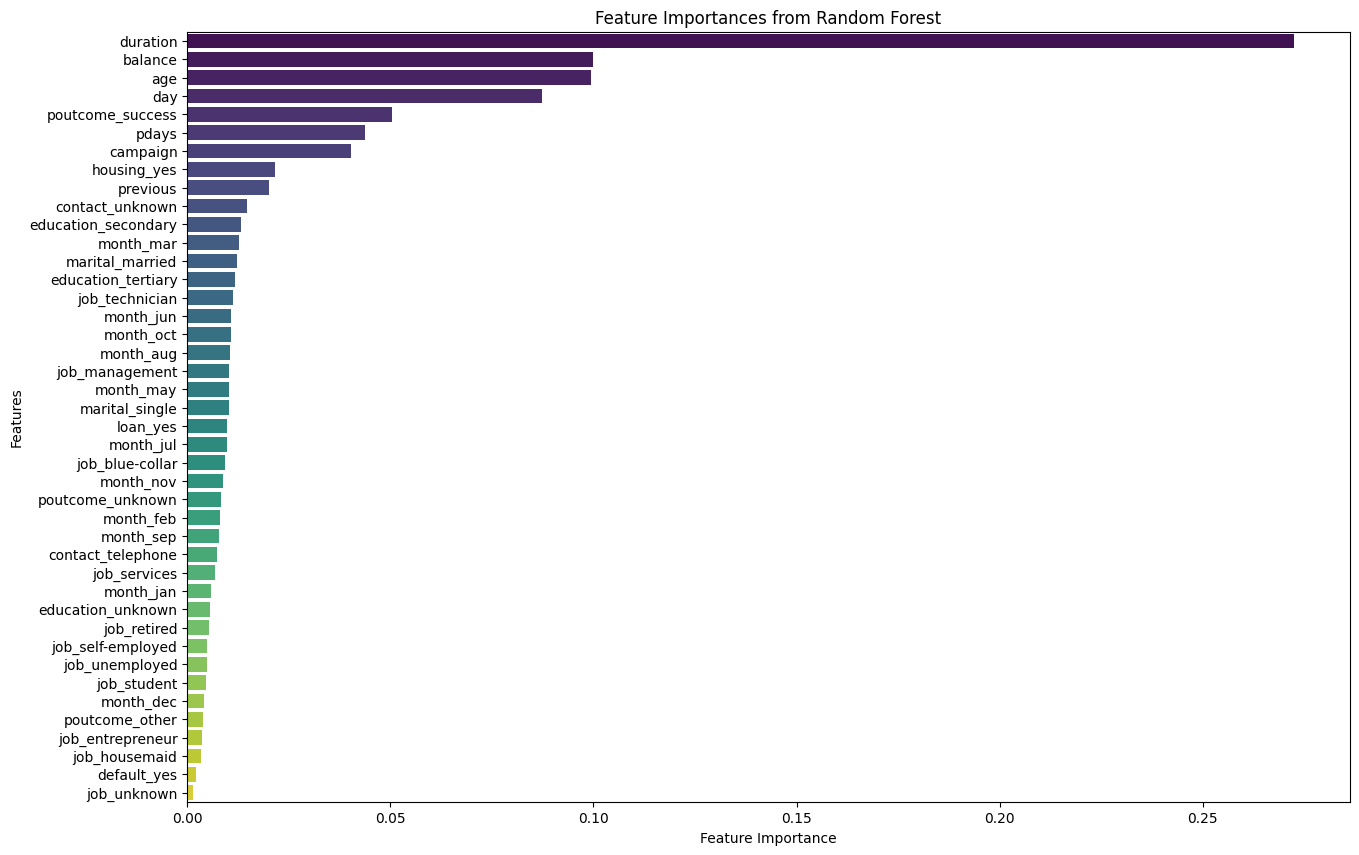

,Feature,Importance
3,duration,0.272568
1,balance,0.099819
0,age,0.099501
2,day,0.087452
40,poutcome_success,0.050291
5,pdays,0.043718
4,campaign,0.040189
24,housing_yes,0.021606
6,previous,0.020141
27,contact_unknown,0.014697


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Convert categorical variables into dummy variables (one-hot encoding)
df_encoded_without_groups = pd.get_dummies(df_without_groups, drop_first=True)

# Define features (X) and target variable (y)
X = df_encoded_without_groups.drop(columns=["response_binary"])  # Features (drop target column)
y_without_group = df_encoded_without_groups["response_binary"]  # Target variable

# Step 2: Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_without_group, test_size=0.2, random_state=42)

# Step 3: Train a Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Step 4: Get feature importances
feature_importances_without_groups = pd.DataFrame({
    "Feature": X.columns,
    "Importance": rf.feature_importances_
}).sort_values(by="Importance", ascending=False)

# Step 5: Plot feature importances
plt.figure(figsize=(15, 10))
sns.barplot(x=feature_importances_without_groups["Importance"], y=feature_importances_without_groups["Feature"], palette="viridis")
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importances from Random Forest")
plt.show()

# Display the feature importance values
display(feature_importances_without_groups)

### Selecting feature set

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

feature_importance_df = feature_importance.sort_values(by="Importance", ascending=False)
sorted_features = feature_importance_df["Features"].tolist()

feature_set= {
  "Top 5":  sorted_features[:5],
  "Top 10" : sorted_features[:10],
  "Top 20" : sorted_features[:20],
  "All" : sorted_features
  }

model= LogisticRegression(max_iter=1000)
result = {}

for subset_name, subset_cols in feature_set.items():
  X_subset = df_encoded[subset_cols]
  X_train, X_test, y_train, y_test = train_test_split(
      X_subset, y , random_state=42, test_size =0.2
  )
  model.fit(X_train, y_train)
  y_pred_proba = model.predict_proba(X_test)[:,1]
  auc = roc_auc_score(y_test, y_pred_proba)
  result[subset_name] = auc

for subset_name, score in result.items():
    print(f"{subset_name}: ROC AUC = {score:.4f}")




/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Top 5: ROC AUC = 0.8482
Top 10: ROC AUC = 0.8641
Top 20: ROC AUC = 0.8870
All: ROC AUC = 0.9076


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
X = df_encoded_without_groups[sorted_features_without_group]
y = df_encoded_without_groups["response_binary"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
        "Logistic Regression": LogisticRegression(max_iter=1000),
        "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42)
    }

    # Store results for each model
results = {}

for model_name, model in models.items():
        # Measure training time
    start_time = time.time()
    model.fit(X_train, y_train)
    end_time = time.time()
    training_time = end_time - start_time

        # Predict probabilities for ROC AUC
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    roc_auc = roc_auc_score(y_test, y_pred_proba)

        # Compute accuracy
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

        # Store results
    results = {
        "ROC AUC": roc_auc,
        "Accuracy": accuracy,
        "Training Time (s)": training_time,
        "Classification Report": classification_report(y_test, y_pred, output_dict=True),
    }

    print(f"✅ {model_name} Results:")
    print(f"   ROC AUC: {roc_auc:.4f}")
    print(f"   Accuracy: {accuracy:.4f}")
    print(f"   Training Time: {training_time:.2f} sec\n")


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


✅ Logistic Regression Results:
   ROC AUC: 0.9003
   Accuracy: 0.8979
   Training Time: 6.06 sec

✅ Random Forest Results:
   ROC AUC: 0.9254
   Accuracy: 0.9040
   Training Time: 6.57 sec



##Model Building

In [ ]:
import joblib

In [ ]:
# Save to Google Drive
#joblib.dump((X_train, X_test, y_train, y_test), "/content/drive/MyDrive/Portugese bank marketing/train_test_split.pkl")

# Later, reload it after reconnection
X_train, X_test, y_train, y_test = joblib.load("/content/drive/MyDrive/Portugese bank marketing/train_test_split.pkl")



In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36168 entries, 3344 to 15795
Data columns (total 42 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   duration             36168 non-null  int64
 1   balance              36168 non-null  int64
 2   age                  36168 non-null  int64
 3   day                  36168 non-null  int64
 4   poutcome_success     36168 non-null  bool 
 5   pdays                36168 non-null  int64
 6   campaign             36168 non-null  int64
 7   housing_yes          36168 non-null  bool 
 8   previous             36168 non-null  int64
 9   contact_unknown      36168 non-null  bool 
 10  education_secondary  36168 non-null  bool 
 11  month_mar            36168 non-null  bool 
 12  marital_married      36168 non-null  bool 
 13  education_tertiary   36168 non-null  bool 
 14  job_technician       36168 non-null  bool 
 15  month_jun            36168 non-null  bool 
 16  month_oct            361

In [ ]:
y_train.info()

<class 'pandas.core.series.Series'>
Index: 36168 entries, 3344 to 15795
Series name: response_binary
Non-Null Count  Dtype
--------------  -----
36168 non-null  int64
dtypes: int64(1)
memory usage: 565.1 KB


###Logistic Regression

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

# Define parameter grid
log_reg_params = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'solver': ['lbfgs', 'liblinear']
}

# Initialize model
log_reg = LogisticRegression(max_iter=1000)

# Perform Grid Search
grid_log = GridSearchCV(log_reg, log_reg_params, scoring='roc_auc', cv=5, n_jobs=-1)
grid_log.fit(X_train, y_train)

y_pred_log_reg = grid_log.predict(X_test)
y_pred_proba_log_reg = grid_log.predict_proba(X_test)[:,1]
roc_auc = roc_auc_score(y_test,y_pred_proba_log_reg)

# Print best parameters
print("Best Logistic Regression Parameters:", grid_log.best_params_)
print(f"roc_auc: {roc_auc}")
# Use best model for predictions
best_log_reg = grid_log.best_estimator_


Best Logistic Regression Parameters: {'C': 100, 'solver': 'liblinear'}
roc_auc: 0.9029957702216967


####Finding best threshold

In [ ]:
import numpy as np
from sklearn.metrics import f1_score

best_threshold = 0.5  # Default threshold
best_f1 = 0

for threshold in np.linspace(0.1, 0.9, 50):
    y_pred_adjusted = (y_pred_proba_log_reg >= threshold).astype(int)  # Convert probabilities to binary
    f1 = f1_score(y_test, y_pred_adjusted)  # Calculate F1-score

    if f1 > best_f1:  # If this threshold gives a better F1-score, update it
        best_f1 = f1
        best_threshold = threshold

print(f"Optimal Threshold: {best_threshold:.2f} (F1-score: {best_f1:.4f})")


Optimal Threshold: 0.20 (F1-score: 0.5856)


###Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

# Define parameter grid
rf_params = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

# Initialize model
rf = RandomForestClassifier(random_state=42)

# Perform Randomized Search (faster than Grid Search)
random_rf = RandomizedSearchCV(rf, rf_params, n_iter=20, scoring='roc_auc', cv=5, n_jobs=-1, random_state=42)
random_rf.fit(X_train, y_train)

y_pred_rf = random_rf.predict(X_test)
y_pred_proba_rf = random_rf.predict_proba(X_test)[:,1]
roc_auc = roc_auc_score(y_test,y_pred_proba_rf)

# Print best parameters
print("Best Random Forest Parameters:", random_rf.best_params_)
print(f"roc_auc: {roc_auc}")

# Use best model for predictions
best_rf = random_rf.best_estimator_


Best Random Forest Parameters: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 30}
roc_auc: 0.9292584102230247


### XG Boost

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import roc_auc_score, accuracy_score, recall_score, f1_score, precision_score

# Define parameter grid
xgb_params = {
    'n_estimators': [100, 200, 300, 500],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7, 10],
    'subsample': [0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.7, 0.8, 0.9, 1.0],
    'reg_alpha': [0, 0.1, 0.5, 1],
    'reg_lambda': [1, 2, 5, 10]
}

# Initialize model
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Perform Randomized Search
random_xgb = RandomizedSearchCV(xgb, xgb_params, n_iter=20, scoring='roc_auc', cv=5, n_jobs=-1, random_state=42)
random_xgb.fit(X_train, y_train)

y_pred_xgb = random_xgb.predict(X_test)
y_pred_proba_xgb = random_xgb.predict_proba(X_test)[:,1]

best_threshold = 0.2
y_pred_xgb_adjusted = (y_pred_proba_xgb >= best_threshold).astype(int)

roc_auc = roc_auc_score(y_test,y_pred_proba_xgb)
accuracy = accuracy_score(y_test, y_pred_xgb_adjusted)
recall = recall_score(y_test, y_pred_xgb_adjusted)
precision = precision_score(y_test, y_pred_xgb_adjusted)
f1 = f1_score(y_test, y_pred_xgb_adjusted)

# Print best parameters
print("Best XGBoost Parameters:", random_xgb.best_params_)
print(f"roc_auc: {roc_auc}")
print(f"Accuracy of XGB: {accuracy:.4f}")
print(f"Precision of XGB: {precision:.4f}")
print(f"Recall of XGB: {recall:.4f}")
print(f"F1-score of XGB: {f1:.4f}")
# Use best model for predictions
best_xgb = random_xgb.best_estimator_


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:21:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best XGBoost Parameters: {'subsample': 0.9, 'reg_lambda': 5, 'reg_alpha': 0, 'n_estimators': 500, 'max_depth': 5, 'learning_rate': 0.05, 'colsample_bytree': 0.8}
roc_auc: 0.9349390338363821
Accuracy of XGB: 0.8831
Precision of XGB: 0.5096
Recall of XGB: 0.8231
F1-score of XGB: 0.6295


##Evaluation & Profit Computation

###ROC Curve Comparision

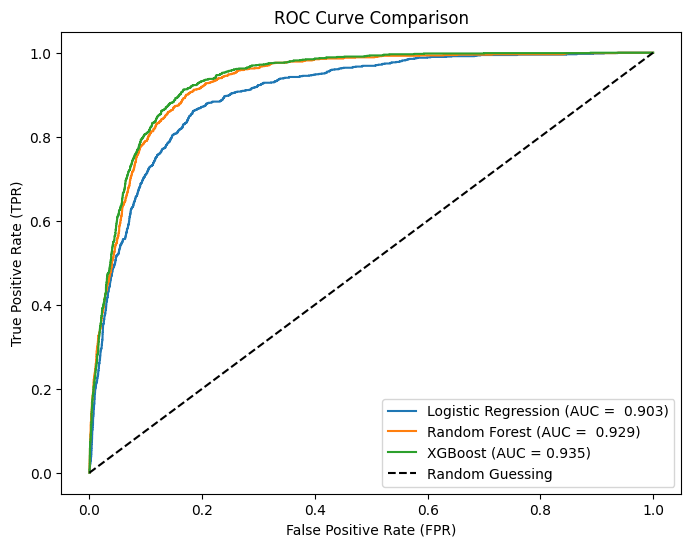

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

plt.figure(figsize = (8,6))

fpr_log, tpr_log, _ = roc_curve(y_test, y_pred_proba_log_reg)
roc_auc_log = auc(fpr_log, tpr_log)
plt.plot(fpr_log, tpr_log, label=f"Logistic Regression (AUC = {roc_auc_log: .3f})")

fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_proba_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {roc_auc_rf: .3f})")

fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_pred_proba_xgb)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)
plt.plot(fpr_xgb, tpr_xgb, label = f"XGBoost (AUC = {roc_auc_xgb :.3f})")

plt.plot([0,1], [0,1], "k--", label = "Random Guessing")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve Comparison")
plt.legend(loc = "lower right")
plt.show()



### Compute Profitability

In [ ]:
# Load dataset (update path as needed)
df = pd.read_csv("bank-full.csv", sep=';', quotechar='"')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [ ]:
average_interest_rate = round(df_financial["euribor3m"].mean(),3)
average_interest_rate

np.float64(3.621)

In [ ]:
def revenue_per_subscription(average_interest_rate, customer_interest_rate, average_deposit_size):
  return round(((average_interest_rate - customer_interest_rate)/100) * average_deposit_size, 2)


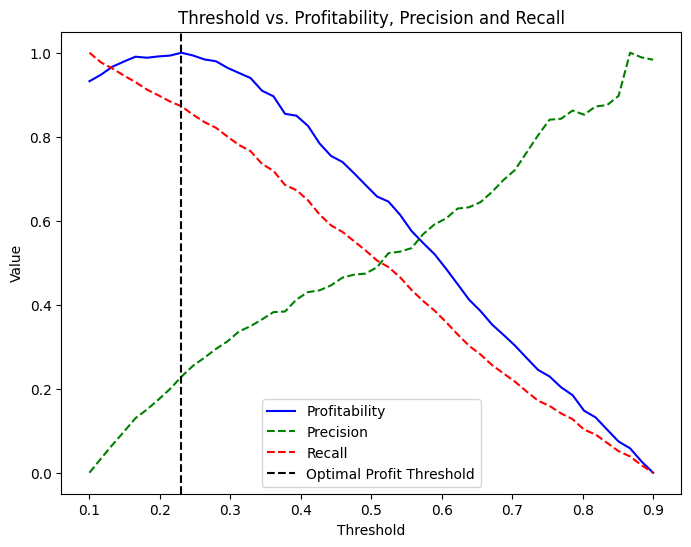

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve

# revenue_per_subscription:500, cost_per_call:10

def compute_profitability(y_true, y_pred_proba, revenue_per_subscription=500, cost_per_call=5):
    """
    Computes profitability for different classification thresholds.

    Parameters:
    - y_true: Actual class labels (0 or 1)
    - y_pred_proba: Predicted probabilities for class 1
    - revenue_per_subscription: Revenue per converted customer (default $500)
    - cost_per_call: Cost of calling a predicted positive (default $10)

    Returns:
    - thresholds: List of tested thresholds
    - profit_values: Corresponding profit values at each threshold
    """
    thresholds = np.linspace(0.1, 0.9, 50)  # Test multiple thresholds
    profit_values = []
    precision_values = []
    recall_values = []

    for threshold in thresholds:
        y_pred = (y_pred_proba >= threshold).astype(int)

        TP = np.sum((y_pred == 1) & (y_true == 1))  # True Positives
        FP = np.sum((y_pred == 1) & (y_true == 0))  # False Positives

        revenue = TP * revenue_per_subscription
        cost = (TP + FP) * cost_per_call
        profit = revenue - cost

        precision = precision_score(y_true, y_pred)
        recall = recall_score(y_true, y_pred)

        precision_values.append(precision)
        recall_values.append(recall)

        profit_values.append(profit)

    return thresholds, profit_values, precision_values, recall_values

#rev_per_sub = revenue_per_subscription(average_interest_rate, 3.3, 10000)
rev_per_sub = revenue_per_subscription(average_interest_rate, 2.5, 2000)

# Example Usage (Assuming y_test and y_pred_proba_xgb are available)
thresholds, profits , precisions, recalls = compute_profitability(y_test, y_pred_proba_xgb, rev_per_sub)

# Normalize values
profits_scaled = (profits - np.min(profits)) / (np.max(profits) - np.min(profits))
precisions_scaled = (precisions - np.min(precisions)) / (np.max(precisions) - np.min(precisions))
recalls_scaled = (recalls - np.min(recalls)) / (np.max(recalls) - np.min(recalls))


# Plot Threshold vs. Profitability Curve
plt.figure(figsize=(8, 6))
plt.plot(thresholds, profits_scaled, label="Profitability", color='blue')
plt.plot(thresholds, precisions_scaled, label = "Precision", color = "green", linestyle = '--')
plt.plot(thresholds, recalls_scaled, label = "Recall", color= "red", linestyle = "--")
plt.xlabel("Threshold")
plt.ylabel("Value")
plt.title("Threshold vs. Profitability, Precision and Recall")
plt.axvline(x=thresholds[np.argmax(profits_scaled)], color='black', linestyle="--", label="Optimal Profit Threshold")
plt.legend()
plt.show()


In [ ]:
rev_per_sub

np.float64(22.42)

In [ ]:
round(thresholds[np.argmax(profits_scaled)],2)

np.float64(0.23)

In [ ]:
max(profits)


np.float64(5589.120000000001)